<style>
#title {
    text-align: center;
    font-family: Helvetica, Sans-serif;
    font-size: 48px
}
#assign_name {
    text-align: center;
    font-size: 24px;
    font-weight: 200
}
#info {
    text-aling: left;
    font-size: 20px;
    font-weight: 200
}
#sub1 {
    text-align: center;
    font-size: 25px;
    font-weight: 200
}
#sub2 {
    text-align: left;
    font-size: 20px;
    font-weight: 200
}
#centered {
    text-align: center;
    font-weight: 500
}
</style>

<h1 id='title'>Lab 1</h1> 
<p id='assign_name'>Optical Recognition of Hadnwritten Digits</p>
<p id='info'>By Sofía Maldonado García</p>
<p id='info'>Course: Machine Learning</p>
<p id='info'>Professor: Juan Antonio Vega Fernandez</p>

In [2]:
# Imports Generales

from sklearn.datasets import load_digits #Dataset
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report

In [3]:
# Data
digits = load_digits(as_frame=True)
X = digits.data.values
Y = digits.target.values
X.shape

(1797, 64)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) #Mismos splits de datos para todos los modelos

# Escalamiento de datos

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 1 - Perceptron From Scratch

In [5]:
# Hyperparameters

y_train_ova = np.eye(10)[y_train]
y_test_ova = np.eye(10)[y_test] # para hacer one-vs-all classification. Más info aquí https://www.dremio.com/wiki/one-vs-all-classification/

lr = 0.1
max_epochs = 100

# Initialization
rng = np.random.default_rng(42)
w = rng.normal(0, 0.01, size=(64,10))
b = np.zeros(10) # Bias

def step(z):
    return (z >= 0).astype(float)

error_history = []

In [6]:
# Training Rule

for e in range(max_epochs):
    errors = 0
    for xi, target_vec in zip(X_train, y_train_ova):
        z = xi @ w + b
        y_hat = step(z)
        update = lr * (target_vec - y_hat)
        w += np.outer(xi, update)
        b += update
        errors += np.sum(update != 0)
        
    error_history.append(errors)
    if errors == 0:
        break

# Para predecir
def predict(X):
    scores = X @ w + b
    return scores.argmax(axis=1)

t_pred_1 = predict(X_train)
y_pred_1 = predict(X_test)

print(f"Train accuracy: {(t_pred_1 == y_train).mean()}")
print(f"Test accuracy: {(y_pred_1 == y_test).mean()}")

Train accuracy: 0.9791231732776617
Test accuracy: 0.95


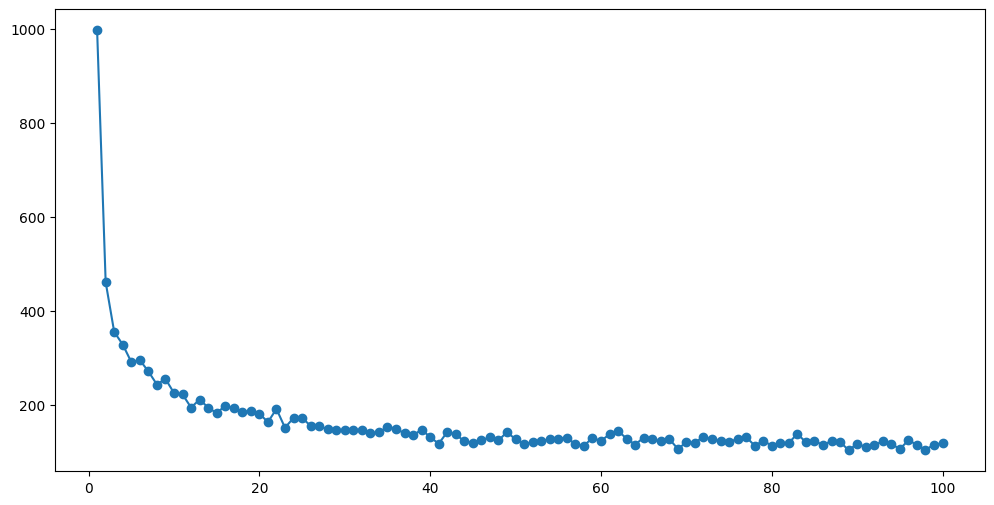

In [7]:
# Plot learning curve

plt.figure(figsize=(12,6))
plt.plot(range(1, len(error_history) + 1), error_history, marker="o")
plt.show()

# 2 - Perceptron, sklearn

In [8]:
# Creación de Modelo
model2 = Perceptron(tol=1e-3, random_state=42, max_iter=1000, verbose=1)

# Fitting a la data de prueba
model2.fit(X_train, y_train)
y_pred_2 = model2.predict(X_test)

-- Epoch 1
Norm: 50.08, NNZs: 61, Bias: -47.000000, T: 1437, Avg. loss: 0.470132
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 57.87, NNZs: 61, Bias: -50.000000, T: 2874, Avg. loss: 0.054274
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 56.84, NNZs: 61, Bias: -55.000000, T: 4311, Avg. loss: 0.030707
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 56.50, NNZs: 61, Bias: -59.000000, T: 5748, Avg. loss: 0.046748
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 56.56, NNZs: 61, Bias: -61.000000, T: 7185, Avg. loss: 0.034871
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 56.56, NNZs: 61, Bias: -61.000000, T: 8622, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 56.56, NNZs: 61, Bias: -61.000000, T: 10059, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 56.56, NNZs: 61, Bias: -61.000000, T: 11496, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 56.56, NNZs: 61, Bias: -61.000000, T: 12933, Avg. los

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [9]:
# Testing

print(classification_report(y_test, y_pred_2, digits=5))  

              precision    recall  f1-score   support

           0    0.96970   0.96970   0.96970        33
           1    0.90323   1.00000   0.94915        28
           2    0.94286   1.00000   0.97059        33
           3    1.00000   1.00000   1.00000        34
           4    0.97826   0.97826   0.97826        46
           5    0.95556   0.91489   0.93478        47
           6    0.94444   0.97143   0.95775        35
           7    0.97059   0.97059   0.97059        34
           8    0.95833   0.76667   0.85185        30
           9    0.92857   0.97500   0.95122        40

    accuracy                        0.95556       360
   macro avg    0.95515   0.95465   0.95339       360
weighted avg    0.95629   0.95556   0.95463       360



# 3 - Multi-layer Perceptron

In [10]:
# Creación de modelo
model3 = MLPClassifier(max_iter=50, verbose=1) # 50 porque el anterior solo necesitó 23, supondré que este necesita incluso menos
model3.fit(X_train, y_train)
y_pred_3 = model3.predict(X_test)

Iteration 1, loss = 2.34696310
Iteration 2, loss = 1.85510326
Iteration 3, loss = 1.45713092
Iteration 4, loss = 1.14666375
Iteration 5, loss = 0.90947468
Iteration 6, loss = 0.73444344
Iteration 7, loss = 0.60281217
Iteration 8, loss = 0.50567549
Iteration 9, loss = 0.43116511
Iteration 10, loss = 0.37363028
Iteration 11, loss = 0.32871140
Iteration 12, loss = 0.29220900
Iteration 13, loss = 0.26321849
Iteration 14, loss = 0.23856760
Iteration 15, loss = 0.21811791
Iteration 16, loss = 0.20127731
Iteration 17, loss = 0.18625833
Iteration 18, loss = 0.17341790
Iteration 19, loss = 0.16128328
Iteration 20, loss = 0.15052211
Iteration 21, loss = 0.14134847
Iteration 22, loss = 0.13278047
Iteration 23, loss = 0.12526967
Iteration 24, loss = 0.11819303
Iteration 25, loss = 0.11175520
Iteration 26, loss = 0.10606437
Iteration 27, loss = 0.10067666
Iteration 28, loss = 0.09569368
Iteration 29, loss = 0.09123549
Iteration 30, loss = 0.08691445
Iteration 31, loss = 0.08292751
Iteration 32, los

c:\Users\pixta\miniconda3\envs\mtml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
# Testing

print(classification_report(y_test, y_pred_3, digits=5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        33
           1    0.93333   1.00000   0.96552        28
           2    0.96970   0.96970   0.96970        33
           3    1.00000   0.94118   0.96970        34
           4    1.00000   1.00000   1.00000        46
           5    0.93750   0.95745   0.94737        47
           6    0.97143   0.97143   0.97143        35
           7    1.00000   0.97059   0.98507        34
           8    0.96552   0.93333   0.94915        30
           9    0.95122   0.97500   0.96296        40

    accuracy                        0.97222       360
   macro avg    0.97287   0.97187   0.97209       360
weighted avg    0.97281   0.97222   0.97227       360



[]

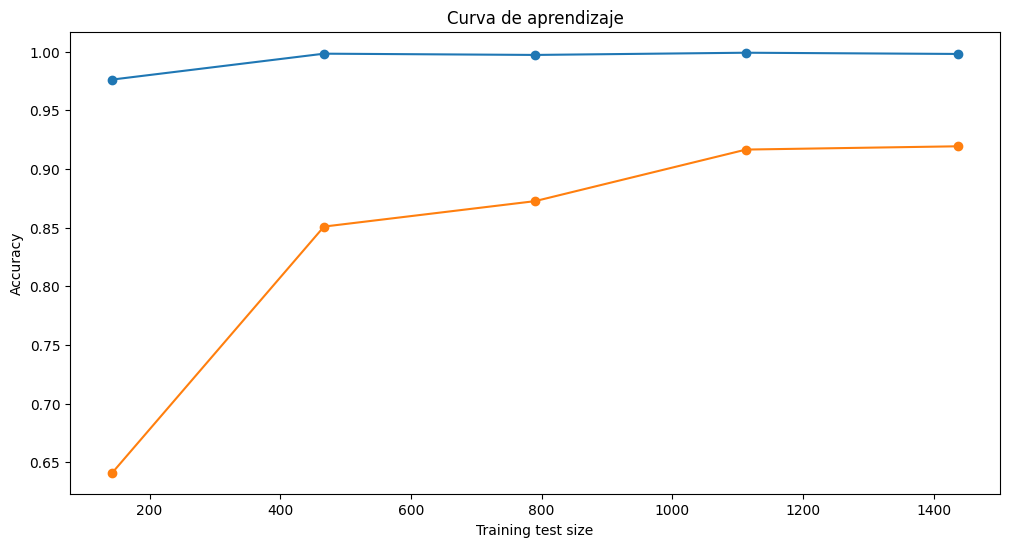

In [12]:
# Curva de aprendizaje

train_size, train_score, test_score = learning_curve(model3, X, Y, cv=5, scoring='accuracy', n_jobs=-1) # learning_curve hace un train_test_split automático

train_mean = np.mean(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)

plt.figure(figsize=(12,6))
plt.plot(train_size, train_mean, label="Training", marker="o")
plt.plot(train_size, test_mean, label='Validation', marker="o")
plt.title('Curva de aprendizaje')
plt.xlabel('Training test size')
plt.ylabel('Accuracy')
plt.plot()

# 4 - SVC

In [13]:
# Creación de modelo
model4 = SVC(max_iter=-1)
model4.fit(X_train, y_train)
y_pred_4 = model4.predict(X_test)

In [14]:
# Testing

print(classification_report(y_test, y_pred_4, digits=5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        33
           1    1.00000   1.00000   1.00000        28
           2    1.00000   1.00000   1.00000        33
           3    1.00000   0.97059   0.98507        34
           4    0.95833   1.00000   0.97872        46
           5    0.95833   0.97872   0.96842        47
           6    0.97222   1.00000   0.98592        35
           7    1.00000   0.94118   0.96970        34
           8    0.96667   0.96667   0.96667        30
           9    0.97436   0.95000   0.96203        40

    accuracy                        0.98056       360
   macro avg    0.98299   0.98072   0.98165       360
weighted avg    0.98091   0.98056   0.98052       360



# 5 - XGBoost Classifier

In [15]:
# Creación de Modelo
model5 = GradientBoostingClassifier(max_depth=3)
model5.fit(X_train, y_train)
y_pred_5 = model5.predict(X_test)

In [16]:
# Testing

print(classification_report(y_test, y_pred_5, digits=5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        33
           1    0.96552   1.00000   0.98246        28
           2    1.00000   0.96970   0.98462        33
           3    1.00000   0.94118   0.96970        34
           4    1.00000   0.97826   0.98901        46
           5    0.97872   0.97872   0.97872        47
           6    0.94286   0.94286   0.94286        35
           7    0.94286   0.97059   0.95652        34
           8    0.90909   1.00000   0.95238        30
           9    0.97436   0.95000   0.96203        40

    accuracy                        0.97222       360
   macro avg    0.97134   0.97313   0.97183       360
weighted avg    0.97316   0.97222   0.97233       360



### Notas y Referencias 

[1] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html <br>
[2] https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html <br>
[3] https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html <br>
[4] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html <br>

# Preguntas
1 - En el Perceptron original, como podría graficar la learning curve?